In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
from control.phaseplot import phase_plot
from numpy import pi
from mpl_toolkits.mplot3d import Axes3D
plt.close('all')

In [ ]:
def org_system(x, t):
    # x1, x2 = X
    dx1dt = x[1] - x[0] * x[1]**2
    dx2dt = -x[0]**3
    return [dx1dt, dx2dt]

def lin_system(x,t):
    dx1dt = x[1]
    dx2dt = x[0]*0
    return np.array([dx1dt, dx2dt])

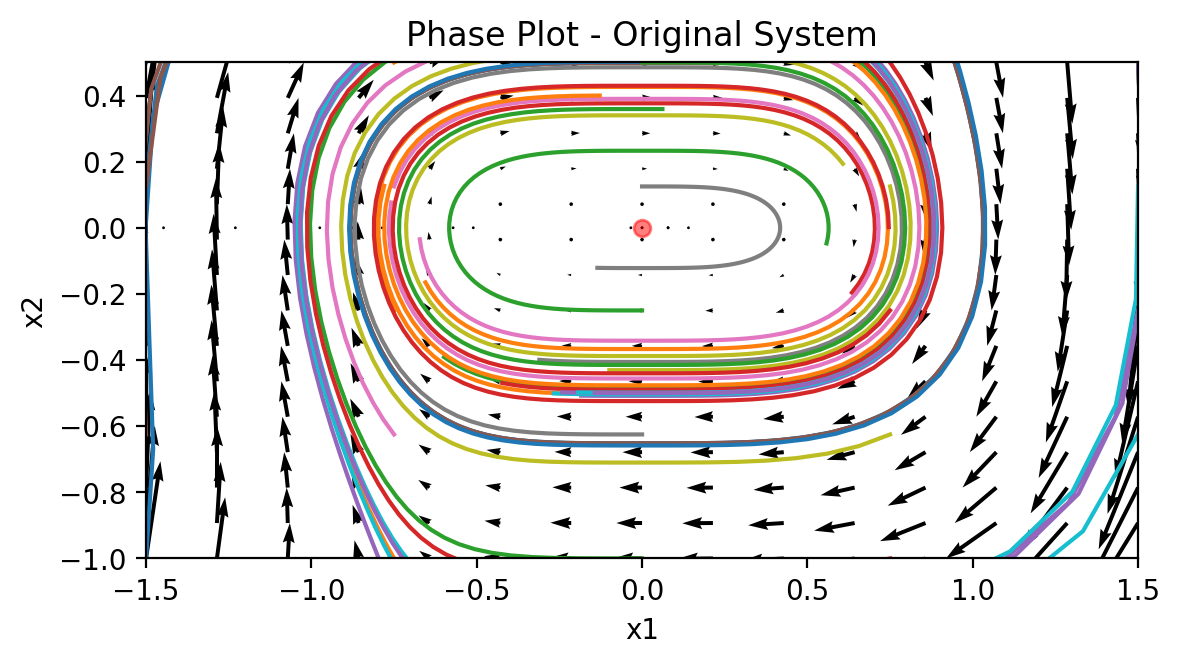

In [ ]:
plt.figure(dpi = 200)
plt.clf()
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1.5, 1.5, -1, 0.5])

plt.title('Phase Plot - Original System')
x1 = np.linspace(-1.5, 1.5, 5)
x2 = np.linspace(-1, 0.5, 5)
X1, X2 = np.meshgrid(x1, x2)
X0 = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))

# Outer trajectories
phase_plot(org_system, X0 = X0, X = (-1.5, 1.5, 15), Y = (-1, 0.5, 15), T = 10)

plt.scatter(x = [0], y = [0], c='r', alpha=0.5)

plt.show()

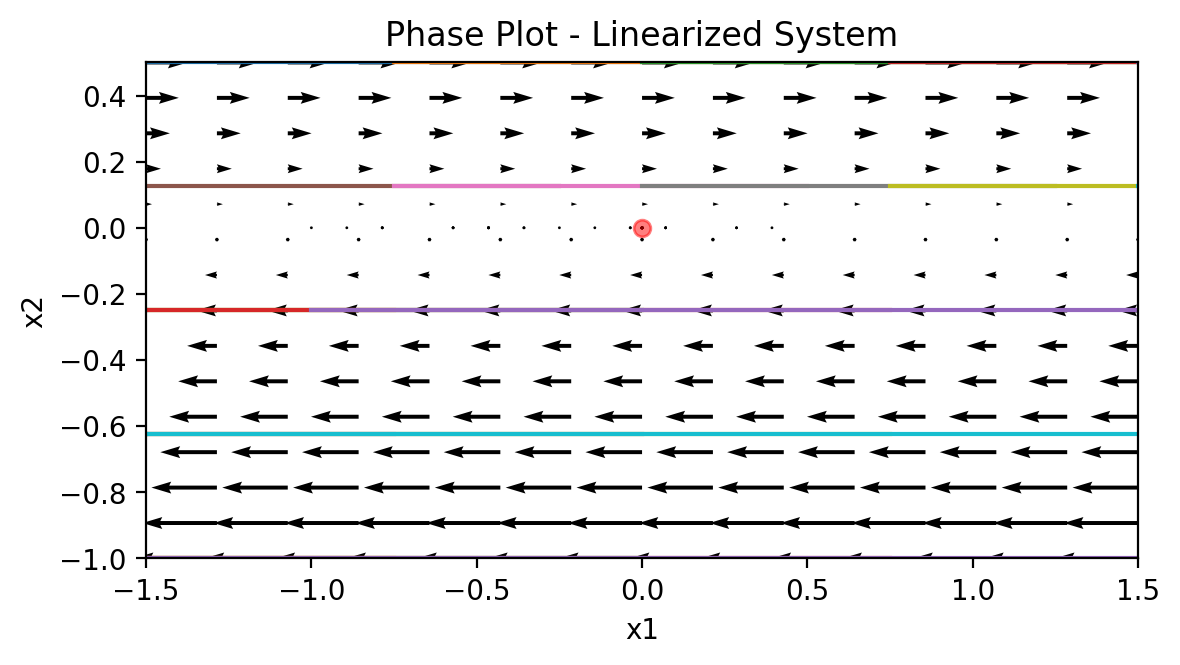

In [ ]:
plt.figure(dpi = 200)
plt.clf()
plt.gca().set_aspect('equal', adjustable='box')
plt.axis([-1.5, 1.5, -1, 0.5])

plt.title('Phase Plot - Linearized System')
x1 = np.linspace(-1.5, 1.5, 5)
x2 = np.linspace(-1, 0.5, 5)
X1, X2 = np.meshgrid(x1, x2)
X0 = np.hstack((X1.reshape(-1,1), X2.reshape(-1,1)))

# Outer trajectories
phase_plot(lin_system, X0 = X0, X = (-1.5, 1.5, 15), Y = (-1, 0.5, 15), T = 10)

plt.scatter(x = [0], y = [0], c='r', alpha=0.5)

plt.show()

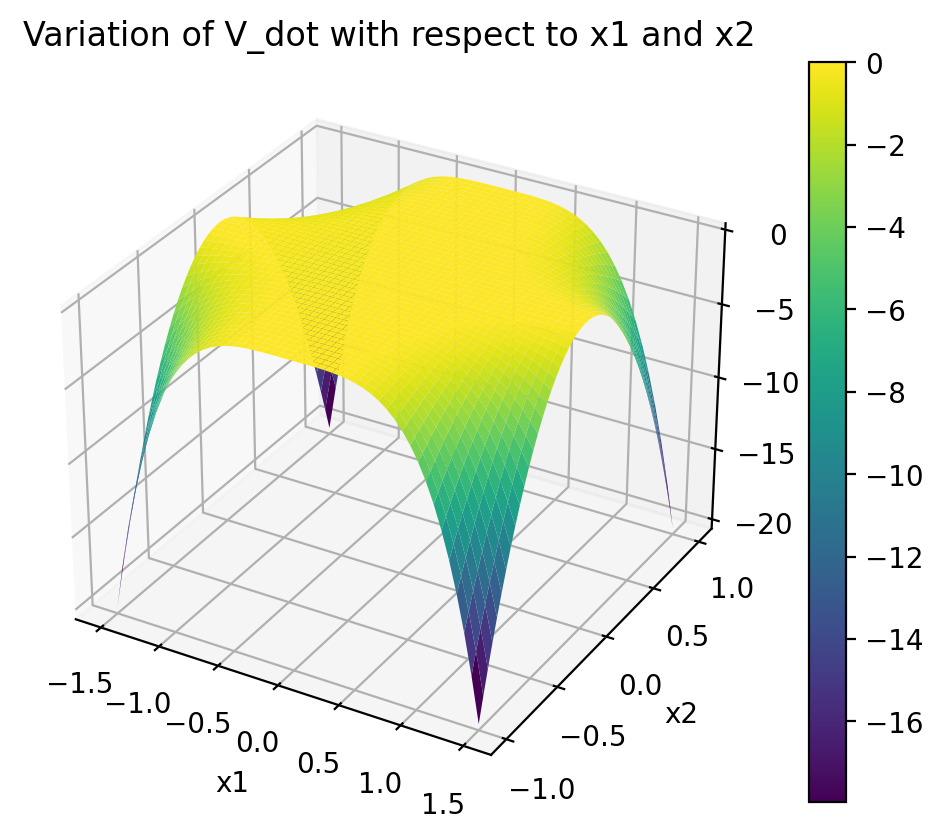

In [ ]:
def V(x1, x2):
    return x1**4 + 2*x2**2


def V_dot(x1, x2):
    dV_dx1 = 4 * x1**3
    dV_dx2 = 4 * x2
    x1_dot = x2 - x1 * (x2**2)
    x2_dot = -x1**3
    return dV_dx1 * x1_dot + dV_dx2 * x2_dot

x1 = np.linspace(-1.5, 1.5, 50)
x2 = np.linspace(-1, 1, 50)
X1, X2 = np.meshgrid(x1, x2)

vdot = V_dot(X1, X2)

# Create the 3D plot
fig = plt.figure(dpi=200)
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
surf = ax.plot_surface(X1, X2, vdot, cmap='viridis')

# Set labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('V_dot')
ax.set_title('Variation of V_dot with respect to x1 and x2')

# Add a color bar
fig.colorbar(surf)

# Show the plot
plt.show()

In [ ]:
################
NOTEBOOK_NAME = "hw5_abijunai.ipynb"
!apt-get install -y pandoc > /dev/null 2>&1
!sudo apt-get install texlive-xetex texlive-fonts-recommended texlive-plain-generic > /dev/null 2>&1
!pip install nbconvert > /dev/null 2>&1

from google.colab import drive, files
drive.mount('/content/drive')
notebook_path = rf'/content/drive/MyDrive/Colab Notebooks/{NOTEBOOK_NAME}'

import os
if os.path.exists(notebook_path):
  !jupyter nbconvert --to pdf "{notebook_path}" > /dev/null 2>&1
  pdf_filename = notebook_path.replace('.ipynb', '.pdf')
  files.download(pdf_filename)
else:
  print("Notebook not found. Please check the path.")
################

Mounted at /content/drive


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>